In [2]:
import os,sys
sys.path.insert(1, os.path.join(sys.path[0], 'utils'))
from mpl_toolkits import mplot3d
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import read_camera
import transform
import pprint
import rigid_transform
from matplotlib.tri import Triangulation

## Endoscope Calibration (1)

In [4]:
endoscope_points = np.matrix([(-0.04338947092614118, -0.023325907286340538, 0.15220528735632186),
  (-0.031143798625279356, -0.022367550323664397, 0.15220528735632186),
  (-0.0192559899385013, -0.02179035031089207, 0.1552567060519124),
  (-0.006786132018930711, -0.020604393246257072, 0.15281766958560145),
  (0.005425352370310331, -0.02026216415600288, 0.1576411904761905),
  (-0.044289511098487874, -0.011972898330787362, 0.1496102659895789),
  (-0.03194187532512598, -0.010997113684096243, 0.14962553672316387),
  (-0.019519932722905645, -0.01012478625416504, 0.14962553672316387),
  (-0.007504326879267832, -0.009482973381018476, 0.15220528735632186),
  (0.004816576618549658, -0.008834185243548853, 0.15578658823529412),
  (-0.0446304686422943, -0.0002755907840643089, 0.14471978142076503),
  (-0.0325235345896459, 0.0005033883802540034, 0.14551494505494506),
  (-0.020361193060485214, 0.001263835587179516, 0.14713177777777778),
  (-0.008374913329835473, 0.0021851550104667774, 0.15092674782240906),
  (0.004319815984771144, 0.0029191645585869837, 0.1511177629337186),
  (-0.04660133224079971, 0.011435410587253222, 0.14466405366091592),
  (-0.03346503100696067, 0.01224646601612744, 0.14315524324324327),
  (-0.020721932672836244, 0.012676949424866824, 0.14162417112299466),
  (-0.008653969377970952, 0.013696520562492789, 0.14471978142076503),
  (0.0038387865280339662, 0.01462264922874846, 0.1462187041639933),
  (-0.04741851715007085, 0.02345050717947532, 0.1408708510638298),
  (-0.0345735885451243, 0.02417323973525236, 0.1408708510638298),
  (-0.021910910294979907, 0.02483094289566872, 0.14162417112299466),
  (-0.009410916707926521, 0.02576135590529011, 0.14238559139784948),
  (0.003222755550890319, 0.026251110611006986, 0.14162417112299466)])
pprint.pprint(endoscope_points)


matrix([[-0.04338947, -0.02332591,  0.15220529],
        [-0.0311438 , -0.02236755,  0.15220529],
        [-0.01925599, -0.02179035,  0.15525671],
        [-0.00678613, -0.02060439,  0.15281767],
        [ 0.00542535, -0.02026216,  0.15764119],
        [-0.04428951, -0.0119729 ,  0.14961027],
        [-0.03194188, -0.01099711,  0.14962554],
        [-0.01951993, -0.01012479,  0.14962554],
        [-0.00750433, -0.00948297,  0.15220529],
        [ 0.00481658, -0.00883419,  0.15578659],
        [-0.04463047, -0.00027559,  0.14471978],
        [-0.03252353,  0.00050339,  0.14551495],
        [-0.02036119,  0.00126384,  0.14713178],
        [-0.00837491,  0.00218516,  0.15092675],
        [ 0.00431982,  0.00291916,  0.15111776],
        [-0.04660133,  0.01143541,  0.14466405],
        [-0.03346503,  0.01224647,  0.14315524],
        [-0.02072193,  0.01267695,  0.14162417],
        [-0.00865397,  0.01369652,  0.14471978],
        [ 0.00383879,  0.01462265,  0.1462187 ],
        [-0.04741852

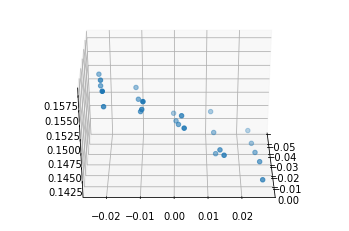

In [88]:
fig = plt.figure()
ax = plt.axes(projection='3d')
X = endoscope_points[:,0]
Y = endoscope_points[:,1]
Z = endoscope_points[:,2]
ax.scatter3D(X, Y, Z)

def rotate(angle):
    ax.view_init(azim=angle)

rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0,362,2),interval=100)
# rot_animation.save('./endoscope.gif', dpi=80, writer='imagemagick')

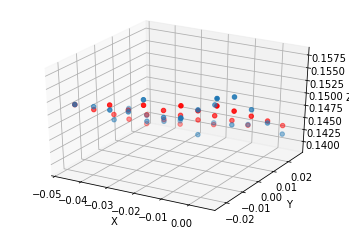

In [93]:
order = 1    # 1: linear, 2: quadratic
if order == 1:
    # best-fit linear plane
    A = np.c_[X, Y, np.ones((25, 1))]
    C,_,_,_ = scipy.linalg.lstsq(A, Z)    # coefficients
    
    # evaluate it on grid
    z = np.asscalar(C[0])*X + np.asscalar(C[1])*Y + np.asscalar(C[2])
    
    # or expressed using matrix/vector product
    #Z = np.dot(np.c_[XX, YY, np.ones(XX.shape)], C).reshape(X.shape)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2)
ax.scatter(X, Y, z, c='r')
ax.scatter(X, Y, Z)
plt.xlabel('X')
plt.ylabel('Y')
ax.set_zlabel('Z')
ax.axis('equal')
ax.axis('tight')
plt.show()

rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0,362,2),interval=100)
rot_animation.save('./endoscope.gif', dpi=80, writer='imagemagick')

## World

In [129]:
world_pts = transform.generate_world()
pprint.pprint(world_pts)

matrix([[0.    , 0.    , 0.    ],
        [0.0125, 0.    , 0.    ],
        [0.025 , 0.    , 0.    ],
        [0.0375, 0.    , 0.    ],
        [0.05  , 0.    , 0.    ],
        [0.    , 0.0125, 0.    ],
        [0.0125, 0.0125, 0.    ],
        [0.025 , 0.0125, 0.    ],
        [0.0375, 0.0125, 0.    ],
        [0.05  , 0.0125, 0.    ],
        [0.    , 0.025 , 0.    ],
        [0.0125, 0.025 , 0.    ],
        [0.025 , 0.025 , 0.    ],
        [0.0375, 0.025 , 0.    ],
        [0.05  , 0.025 , 0.    ],
        [0.    , 0.0375, 0.    ],
        [0.0125, 0.0375, 0.    ],
        [0.025 , 0.0375, 0.    ],
        [0.0375, 0.0375, 0.    ],
        [0.05  , 0.0375, 0.    ],
        [0.    , 0.05  , 0.    ],
        [0.0125, 0.05  , 0.    ],
        [0.025 , 0.05  , 0.    ],
        [0.0375, 0.05  , 0.    ],
        [0.05  , 0.05  , 0.    ]])


In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
X = world_pts[:,0]
Y = world_pts[:,1]
Z = world_pts[:,2]
ax.scatter3D(X, Y, Z)

rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 362, 2), interval=100)
# rot_animation.save('../world.gif', dpi=80, writer='imagemagick')

## PSM2 Data

In [ ]:
psm2_data = list(transform.load_all('world/psm2_recordings.txt'))
psm2_pts = transform.psm_data_to_matrix(psm2_data)
pprint.pprint(psm2_pts)

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
X = psm2_pts[:,0]
Y = psm2_pts[:,1]
Z = psm2_pts[:,2]
ax.scatter3D(X, Y, Z)

rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 362, 2), interval=100)

## Transformations (ENDOSCOPE & PSM2)

In [ ]:
T2_E = transform.get_transform("PSM2", "Endoscope", psm2_pts, endoscope_points)
TE_2 = transform.get_transform("Endoscope", "PSM2", endoscope_points, psm2_pts)

In [ ]:
psm2_e = transform.transform_data("PSM2", "Endoscope", psm2_pts, T2_E, endoscope_points)
psme_2 = transform.transform_data("Endoscope", "PSM2", endoscope_points, TE_2, psm2_pts)

## PSM2 Transformed to Endoscope

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
X = psm2_e[:,0]
Y = psm2_e[:,1]
Z = psm2_e[:,2]
ax.scatter3D(X, Y, Z)

rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 362, 2), interval=100)



## Endoscope Transformed to PSM2

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
X = psme_2[:,0]
Y = psme_2[:,1]
Z = psme_2[:,2]
ax.scatter3D(X, Y, Z)

rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 362, 2), interval=100)


## Endoscope Calibration (2)

In [ ]:
raw_points = list(read_camera.load_all('calibration/endoscope_chesspts.p'))
world_endo = np.matrix(raw_points[0])
pprint.pprint(world_endo)
fig = plt.figure()
ax = plt.axes(projection='3d')
X = world_endo[:,0]
Y = world_endo[:,1]
Z = world_endo[:,2]
ax.scatter3D(X, Y, Z)

def rotate(angle):
    ax.view_init(azim=angle)

rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 362, 2), interval=100)
# rot_animation.save('../../world_endoscope.gif', dpi=80, writer='imagemagick')